In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [2]:
sns.set_style()

In [3]:
train_data=pd.read_csv(r"C:\Users\welcome\Desktop\Data Sets\train.csv")
test_data=pd.read_csv(r"C:\Users\welcome\Desktop\Data Sets\test.csv")

In [4]:
train_data.head(20)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0            FDA15        9.300          Low Fat         0.016047   
1            DRC01        5.920          Regular         0.019278   
2            FDN15       17.500          Low Fat         0.016760   
3            FDX07       19.200          Regular         0.000000   
4            NCD19        8.930          Low Fat         0.000000   
5            FDP36       10.395          Regular         0.000000   
6            FDO10       13.650          Regular         0.012741   
7            FDP10          NaN          Low Fat         0.127470   
8            FDH17       16.200          Regular         0.016687   
9            FDU28       19.200          Regular         0.094450   
10           FDY07       11.800          Low Fat         0.000000   
11           FDA03       18.500          Regular         0.045464   
12           FDX32       15.100          Regular         0.100014   
13           FDS46       17.600          Regular         0.047257   
14           FDF32       16.350          Low Fat         0.068024   
15           FDP49        9.000          Regular         0.069089   
16           NCB42       11.800          Low Fat         0.008596   
17           FDP49        9.000          Regular         0.069196   
18           DRI11          NaN          Low Fat         0.034238   
19           FDU02       13.350          Low Fat         0.102492   

                Item_Type  Item_MRP Outlet_Identifier  \
0                   Dairy  249.8092            OUT049   
1             Soft Drinks   48.2692            OUT018   
2                    Meat  141.6180            OUT049   
3   Fruits and Vegetables  182.0950            OUT010   
4               Household   53.8614            OUT013   
5            Baking Goods   51.4008            OUT018   
6             Snack Foods   57.6588            OUT013   
7             Snack Foods  107.7622            OUT027   
8            Frozen Foods   96.9726            OUT045   
9            Frozen Foods  187.8214            OUT017   
10  Fruits and Vegetables   45.5402            OUT049   
11                  Dairy  144.1102            OUT046   
12  Fruits and Vegetables  145.4786            OUT049   
13            Snack Foods  119.6782            OUT046   
14  Fruits and Vegetables  196.4426            OUT013   
15              Breakfast   56.3614            OUT046   
16     Health and Hygiene  115.3492            OUT018   
17              Breakfast   54.3614            OUT049   
18            Hard Drinks  113.2834            OUT027   
19                  Dairy  230.5352            OUT035   

    Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                        1999      Medium               Tier 1   
1                        2009      Medium               Tier 3   
2                        1999      Medium               Tier 1   
3                        1998         NaN               Tier 3   
4                        1987        High               Tier 3   
5                        2009      Medium               Tier 3   
6                        1987        High               Tier 3   
7                        1985      Medium               Tier 3   
8                        2002         NaN               Tier 2   
9                        2007         NaN               Tier 2   
10                       1999      Medium               Tier 1   
11                       1997       Small               Tier 1   
12                       1999      Medium               Tier 1   
13                       1997       Small               Tier 1   
14                       1987        High               Tier 3   
15                       1997       Small               Tier 1   
16                       2009      Medium               Tier 3   
17                       1999      Medium               Tier 1   
18                       1985      Medium               Tier 3   
19                       2004      

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train_data.drop_duplicates(inplace=True)


In [7]:
train_data.value_counts("Item_Identifier")

Item_Identifier
FDG33    10
FDW13    10
NCL31     9
FDX04     9
NCQ06     9
         ..
FDN52     1
FDC23     1
FDT35     1
DRF48     1
FDE52     1
Length: 1559, dtype: int64

In [8]:
train_data.value_counts("Item_Fat_Content")

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
dtype: int64

In [9]:
train_data[[train_data["Item_Fat_Content"].isin(["LF","low fat"])]]="Low Fat"
train_data[[train_data["Item_Fat_Content"].isin(["reg"])]]="Regular"
train_data.value_counts("Item_Fat_Content")

Item_Fat_Content
Low Fat    5517
Regular    3006
dtype: int64

In [10]:
train_data.value_counts("Item_Type")

Item_Type
Fruits and Vegetables    1157
Snack Foods              1130
Household                 840
Frozen Foods              811
Dairy                     640
Canned                    611
Baking Goods              607
Health and Hygiene        481
Low Fat                   428
Soft Drinks               409
Meat                      407
Breads                    234
Hard Drinks               199
Others                    156
Starchy Foods             131
Regular                   117
Breakfast                 106
Seafood                    59
dtype: int64

In [11]:
train_data.value_counts("Outlet_Identifier") 

Outlet_Identifier
OUT045     879
OUT027     877
OUT049     876
OUT035     873
OUT046     872
OUT013     869
OUT017     867
OUT018     859
OUT010     515
OUT019     491
Low Fat    428
Regular    117
dtype: int64

In [12]:
identifier_is_lf_or_reg=train_data["Outlet_Identifier"].isin(["Low Fat", "Regular"])
train_data[identifier_is_lf_or_reg]

Item_Identifier Item_Weight Item_Fat_Content Item_Visibility Item_Type  \
27           Low Fat     Low Fat          Low Fat         Low Fat   Low Fat   
45           Low Fat     Low Fat          Low Fat         Low Fat   Low Fat   
65           Low Fat     Low Fat          Low Fat         Low Fat   Low Fat   
74           Low Fat     Low Fat          Low Fat         Low Fat   Low Fat   
81           Regular     Regular          Regular         Regular   Regular   
...              ...         ...              ...             ...       ...   
8391         Low Fat     Low Fat          Low Fat         Low Fat   Low Fat   
8404         Low Fat     Low Fat          Low Fat         Low Fat   Low Fat   
8443         Low Fat     Low Fat          Low Fat         Low Fat   Low Fat   
8467         Low Fat     Low Fat          Low Fat         Low Fat   Low Fat   
8517         Regular     Regular          Regular         Regular   Regular   

     Item_MRP Outlet_Identifier Outlet_Establishment_Year Outlet_Size  \
27    Low Fat           Low Fat                   Low Fat     Low Fat   
45    Low Fat           Low Fat                   Low Fat     Low Fat   
65    Low Fat           Low Fat                   Low Fat     Low Fat   
74    Low Fat           Low Fat                   Low Fat     Low Fat   
81    Regular           Regular                   Regular     Regular   
...       ...               ...                       ...         ...   
8391  Low Fat           Low Fat                   Low Fat     Low Fat   
8404  Low Fat           Low Fat                   Low Fat     Low Fat   
8443  Low Fat           Low Fat                   Low Fat     Low Fat   
8467  Low Fat           Low Fat                   Low Fat     Low Fat   
8517  Regular           Regular                   Regular     Regular   

     Outlet_Location_Type Outlet_Type Item_Outlet_Sales  
27                Low Fat     Low Fat           Low Fat  
45                Low Fat     Low Fat           Low Fat  
65                Low Fat     Low Fat           Low Fat  
74                Low Fat     Low Fat           Low Fat  
81                Regular     Regular           Regular  
...                   ...         ...               ...  
8391              Low Fat     Low Fat           Low Fat  
8404              Low Fat     Low Fat           Low Fat  
8443              Low Fat     Low Fat           Low Fat  
8467              Low Fat     Low Fat           Low Fat  
8517              Regular     Regular           Regular  

[545 rows x 12 columns]

In [13]:
train_data.drop_duplicates(inplace=True)

In [14]:
train_data.value_counts("Outlet_Identifier") 

Outlet_Identifier
OUT045     879
OUT027     877
OUT049     876
OUT035     873
OUT046     872
OUT013     869
OUT017     867
OUT018     859
OUT010     515
OUT019     491
Low Fat      1
Regular      1
dtype: int64

In [15]:
identifier_is_lf_or_reg=train_data["Outlet_Identifier"].isin(["Low Fat", "Regular"])
train_data.drop(train_data[identifier_is_lf_or_reg].index, inplace=True)

In [16]:
train_data["Outlet_Establishment_Year"].value_counts()

1985    1368
2002     879
1999     876
2004     873
1997     872
1987     869
2007     867
2009     859
1998     515
Name: Outlet_Establishment_Year, dtype: int64

In [17]:
train_data["Outlet_Establishment_Year"].value_counts()

1985    1368
2002     879
1999     876
2004     873
1997     872
1987     869
2007     867
2009     859
1998     515
Name: Outlet_Establishment_Year, dtype: int64

In [18]:
train_data.value_counts("Outlet_Size") 

Outlet_Size
Medium    2612
Small     2236
High       869
dtype: int64

In [19]:
train_data.value_counts( "Outlet_Location_Type") 

Outlet_Location_Type
Tier 3    3120
Tier 2    2619
Tier 1    2239
dtype: int64

In [20]:
train_data.value_counts("Outlet_Type") 

Outlet_Type
Supermarket Type1    5236
Grocery Store        1006
Supermarket Type3     877
Supermarket Type2     859
dtype: int64

In [21]:
print(train_data["Outlet_Size"].isna().sum()/8523)

0.2652821776369823


In [22]:
train_data.groupby("Outlet_Identifier")["Outlet_Size"].apply(lambda x: x.unique())

Outlet_Identifier
OUT010       [nan]
OUT013      [High]
OUT017       [nan]
OUT018    [Medium]
OUT019     [Small]
OUT027    [Medium]
OUT035     [Small]
OUT045       [nan]
OUT046     [Small]
OUT049    [Medium]
Name: Outlet_Size, dtype: object

In [23]:
train_data.groupby("Outlet_Identifier")["Outlet_Size"].apply(lambda x: x.mode()).to_dict()

{('OUT013', 0): 'High',
 ('OUT018', 0): 'Medium',
 ('OUT019', 0): 'Small',
 ('OUT027', 0): 'Medium',
 ('OUT035', 0): 'Small',
 ('OUT046', 0): 'Small',
 ('OUT049', 0): 'Medium'}

In [24]:
identifier_dict={'OUT010': 'Medium',
 'OUT013': 'High',
 'OUT017': 'Medium',
 'OUT018': 'Medium',
 'OUT019': 'Small',
 'OUT027': 'Medium',
 'OUT035': 'Small',
 'OUT045': 'Medium',
 'OUT046': 'Small',
 'OUT049': 'Medium'}

In [25]:
train_data["Outlet_Size"]=train_data["Outlet_Size"].fillna(train_data["Outlet_Identifier"].map(identifier_dict))

In [26]:
print(train_data["Outlet_Size"].isna().sum()/8523)

0.0


In [27]:
print(train_data["Item_Weight"].isna().sum()/8523)

0.16050686378035903


In [28]:
weight_dict=train_data.groupby("Item_Type")["Item_Weight"].mean().to_dict()

In [29]:
train_data["Item_Weight"]=train_data["Item_Weight"].fillna(train_data["Item_Type"].map(weight_dict))

In [30]:
print(train_data["Item_Weight"].isna().sum()/8523)

0.0


In [31]:
train_data.select_dtypes(include='number').dtypes

Item_Weight    float64
dtype: object

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7978 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7978 non-null   object 
 1   Item_Weight                7978 non-null   float64
 2   Item_Fat_Content           7978 non-null   object 
 3   Item_Visibility            7978 non-null   object 
 4   Item_Type                  7978 non-null   object 
 5   Item_MRP                   7978 non-null   object 
 6   Outlet_Identifier          7978 non-null   object 
 7   Outlet_Establishment_Year  7978 non-null   object 
 8   Outlet_Size                7978 non-null   object 
 9   Outlet_Location_Type       7978 non-null   object 
 10  Outlet_Type                7978 non-null   object 
 11  Item_Outlet_Sales          7978 non-null   object 
dtypes: float64(1), object(11)
memory usage: 810.3+ KB


In [33]:
train_data["Item_Visibility"]=train_data["Item_Visibility"].astype("float64")
train_data["Item_MRP"]=train_data["Item_MRP"].astype("float64")
train_data["Outlet_Establishment_Year"]=train_data["Outlet_Establishment_Year"].astype("int64")
train_data["Item_Outlet_Sales"]=train_data["Item_Outlet_Sales"].astype("float64")

In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7978 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7978 non-null   object 
 1   Item_Weight                7978 non-null   float64
 2   Item_Fat_Content           7978 non-null   object 
 3   Item_Visibility            7978 non-null   float64
 4   Item_Type                  7978 non-null   object 
 5   Item_MRP                   7978 non-null   float64
 6   Outlet_Identifier          7978 non-null   object 
 7   Outlet_Establishment_Year  7978 non-null   int64  
 8   Outlet_Size                7978 non-null   object 
 9   Outlet_Location_Type       7978 non-null   object 
 10  Outlet_Type                7978 non-null   object 
 11  Item_Outlet_Sales          7978 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 810.3+ KB


In [35]:
train_data.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7978.000000      7978.000000  7978.000000                7978.000000   
mean     12.864958         0.066121   141.238902                1997.832916   
std       4.234486         0.051258    62.206737                   8.360112   
min       4.555000         0.000000    31.290000                1985.000000   
25%       9.331250         0.027103    94.146200                1987.000000   
50%      12.875456         0.054036   143.079900                1999.000000   
75%      16.000000         0.094548   185.916100                2004.000000   
max      21.350000         0.325781   266.888400                2009.000000   

       Item_Outlet_Sales  
count        7978.000000  
mean         2190.082670  
std          1714.504869  
min            33.290000  
25%           834.913200  
50%          1800.323200  
75%          3105.790550  
max         13086.964800

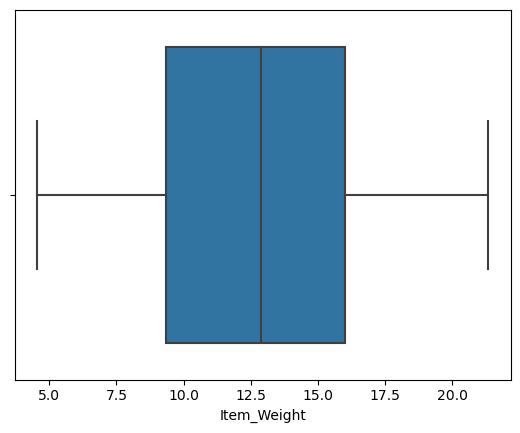

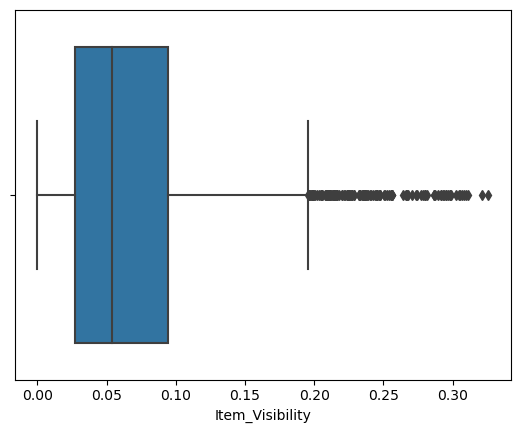

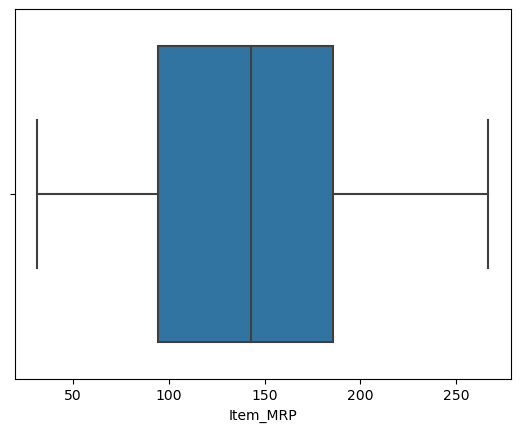

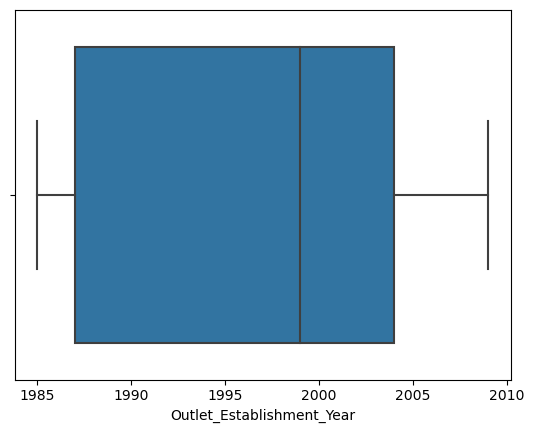

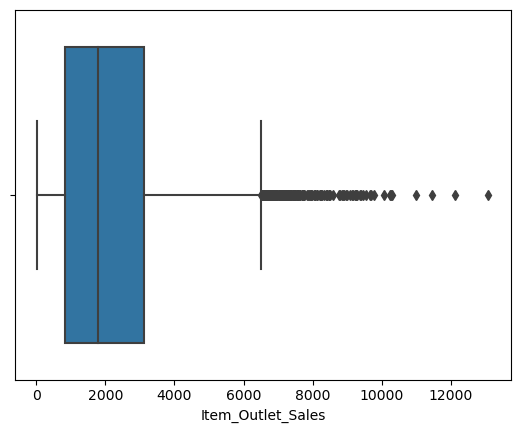

In [36]:
Columns = np.array(train_data.select_dtypes(include='number').columns)

for col in Columns:
    sns.boxplot(x=col, data=train_data)
    plt.show()

In [37]:
# Removing Outliers

In [38]:
Columns = np.array(train_data.select_dtypes(include='number').columns)

for col in Columns:
    IQR=train_data[col].quantile(0.75)-train_data[col].quantile(0.25)
    lower=train_data[col].quantile(0.25) - 1.5*IQR
    upper=train_data[col].quantile(0.75) + 1.5*IQR
    outlier=(train_data[col]<=lower)|(train_data[col]>=upper)
    train_data.drop(train_data[outlier].index, inplace=True)

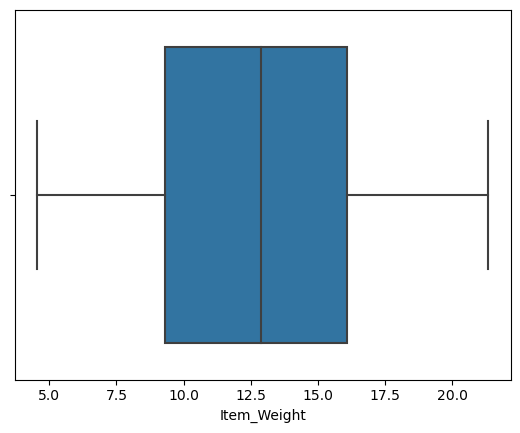

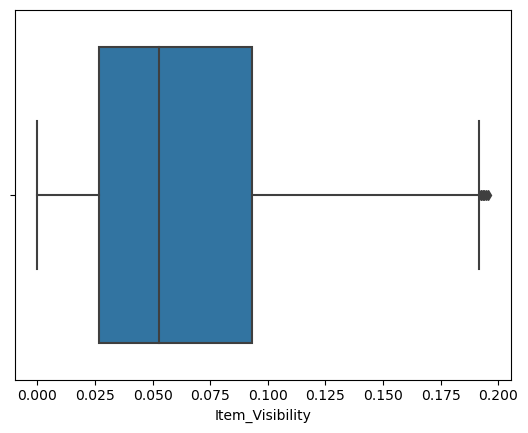

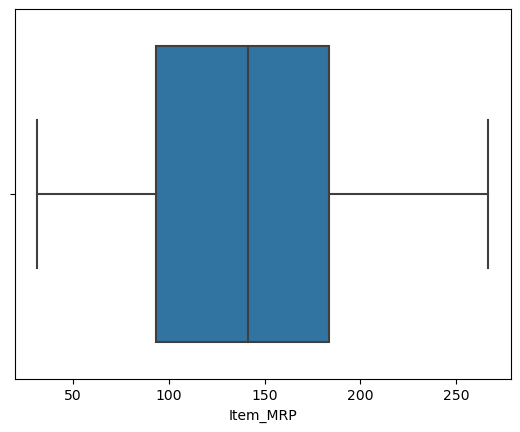

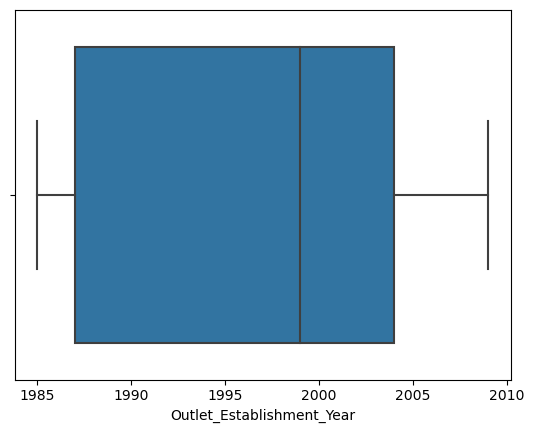

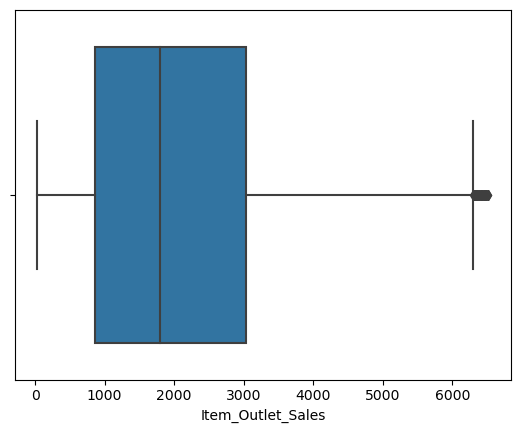

In [39]:
 Columns = np.array(train_data.select_dtypes(include='number').columns)

 for col in Columns:
     sns.boxplot(x=col, data=train_data)
     plt.show()

In [40]:
#Removed Outliers

In [41]:
Columns = np.array(train_data.select_dtypes(include='number').columns)

for col in Columns:
     print('Skewness of' + col + 'is:'+ str(train_data[col].skew()))
     print('Kurtsis of'+ col +' is:'+ str(train_data[col].kurt()))

Skewness ofItem_Weightis:0.07930499425877933
Kurtsis ofItem_Weight is:-0.914317699456419
Skewness ofItem_Visibilityis:0.7330873649411891
Kurtsis ofItem_Visibility is:-0.2816280514564711
Skewness ofItem_MRPis:0.14893526461740292
Kurtsis ofItem_MRP is:-0.8499013244447657
Skewness ofOutlet_Establishment_Yearis:-0.44032832618766204
Kurtsis ofOutlet_Establishment_Year is:-1.1401214169720681
Skewness ofItem_Outlet_Salesis:0.7702509628219354
Kurtsis ofItem_Outlet_Sales is:-0.12510568334313055


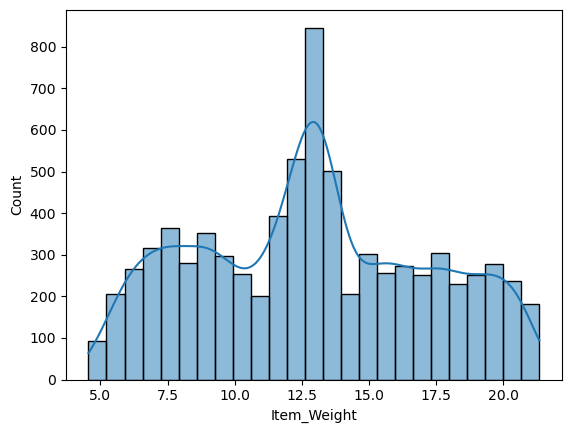

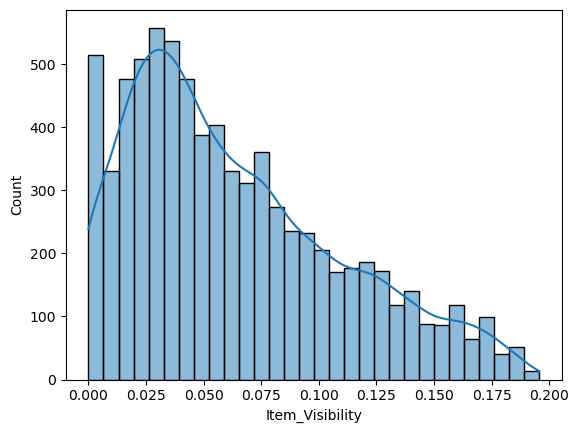

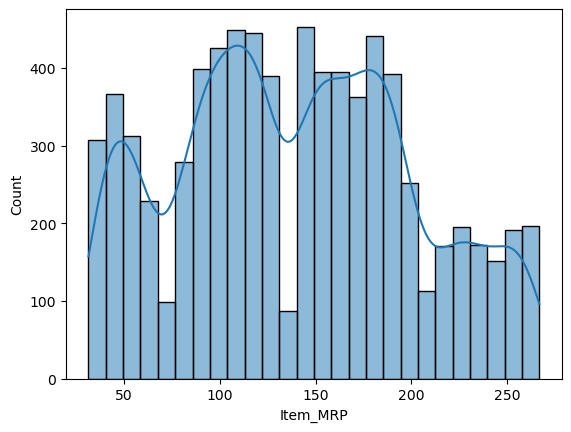

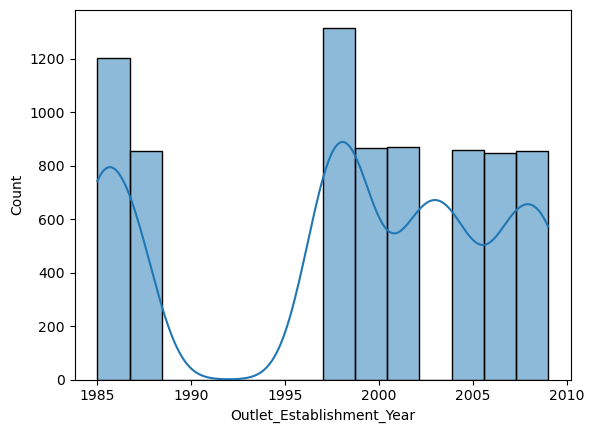

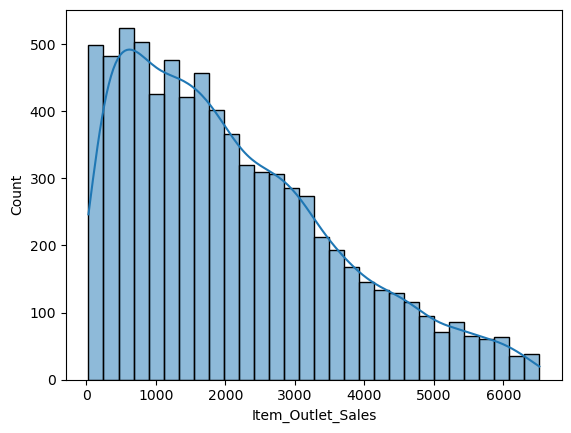

In [42]:
Columns = np.array(train_data.select_dtypes(include='number').columns)

for col in Columns:
     sns.histplot(x=col, data=train_data, kde=True)
     plt.show()

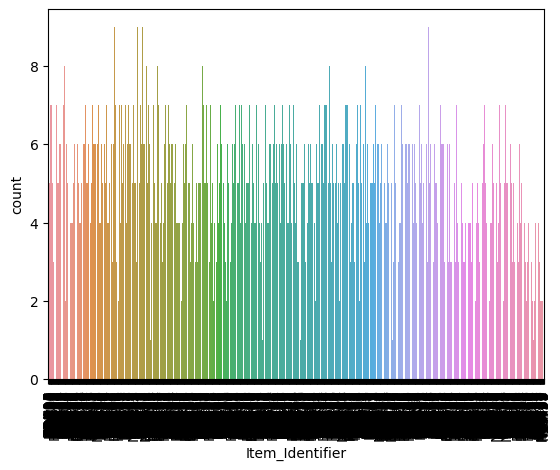

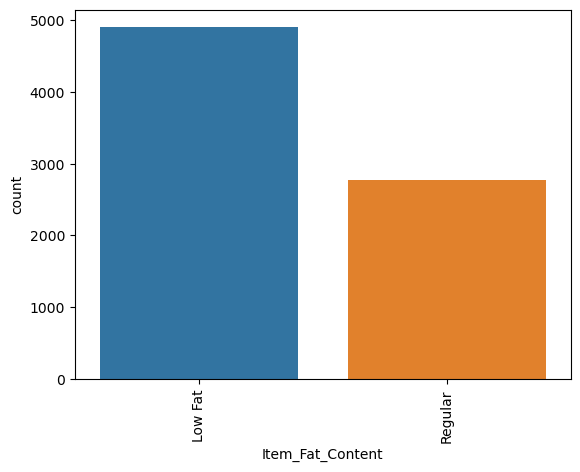

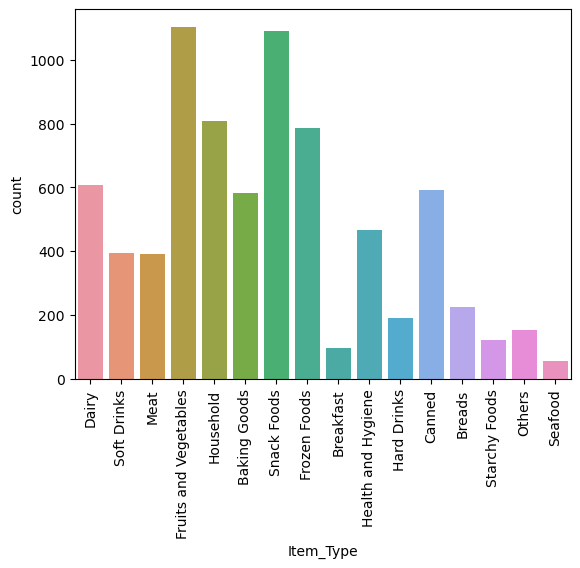

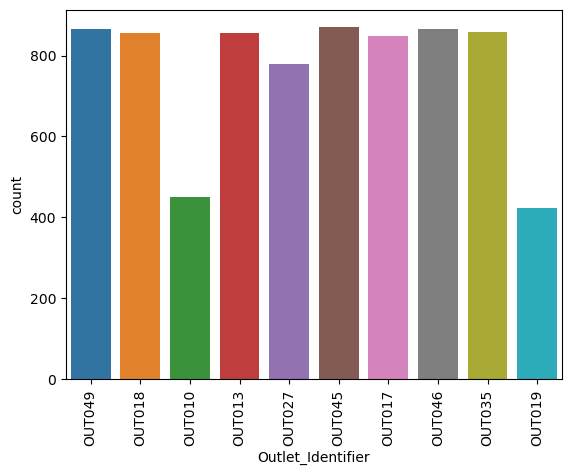

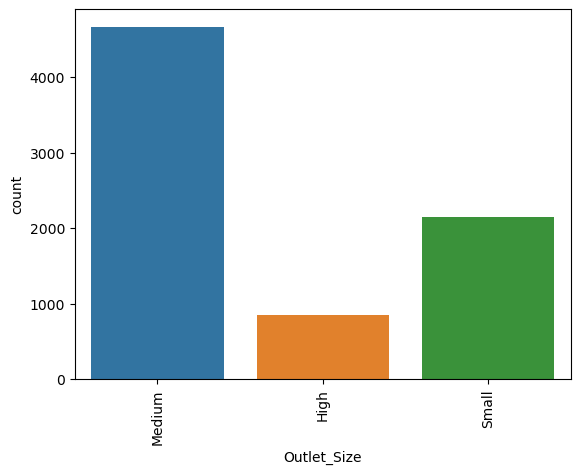

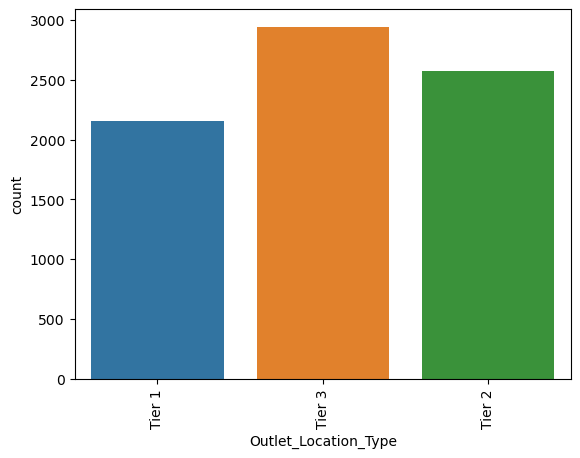

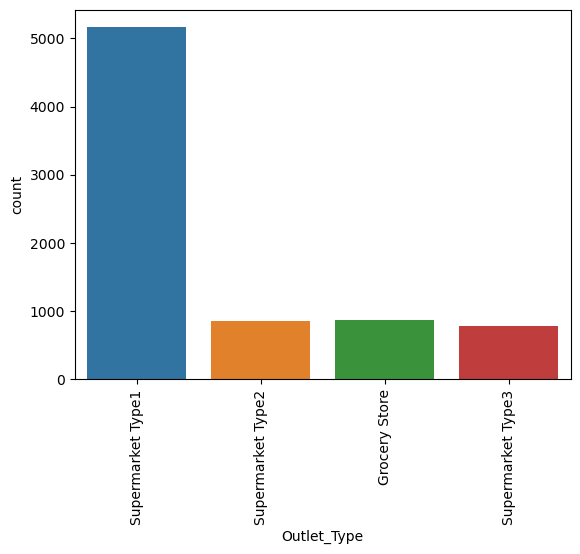

In [43]:
 Columns = np.array(train_data.select_dtypes(include='object').columns)

 for col in Columns:
     sns.countplot(x=col, data=train_data)
     plt.xticks(rotation=90)
     plt.show()

<AxesSubplot:>

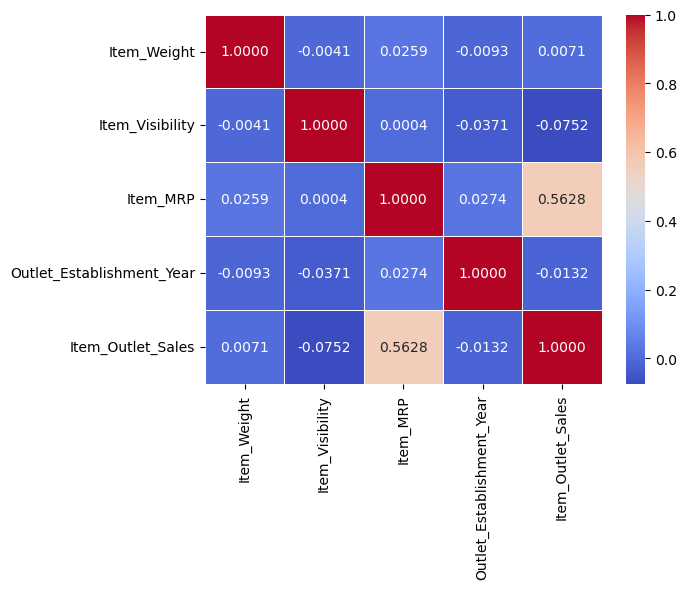

In [44]:
train_data.corr()
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)

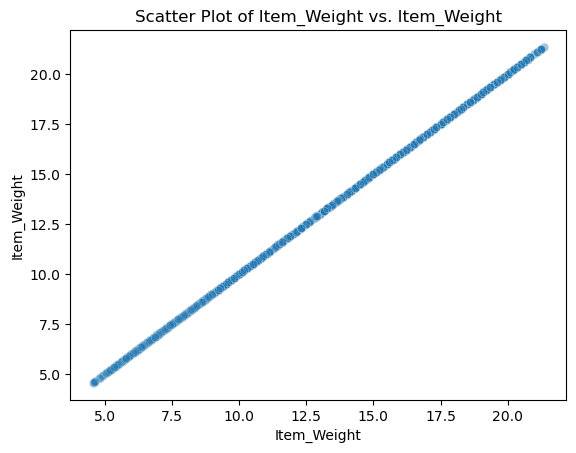

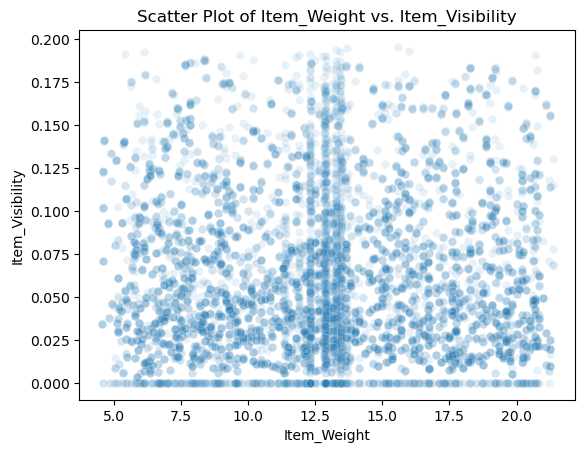

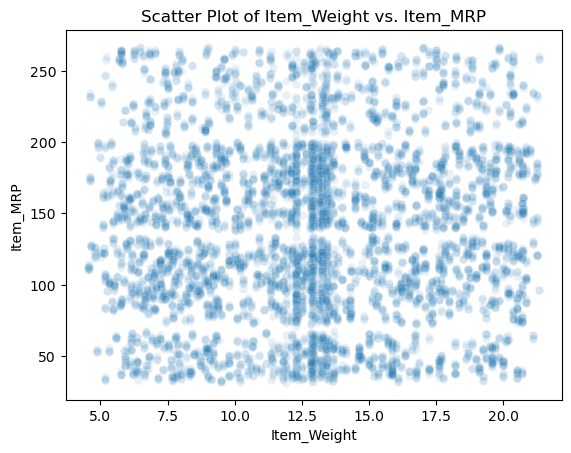

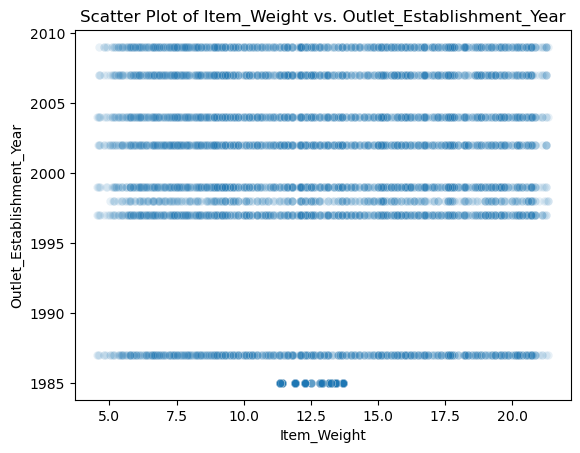

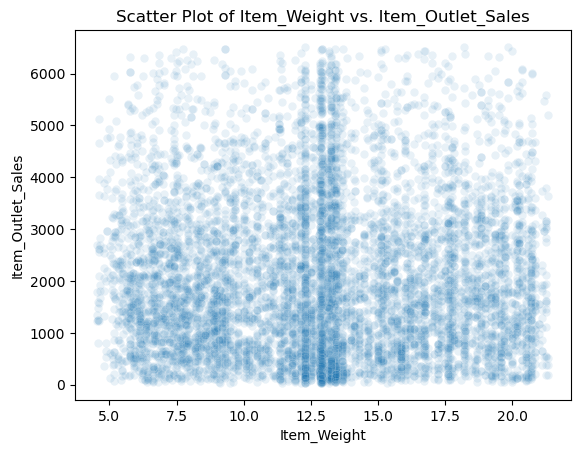

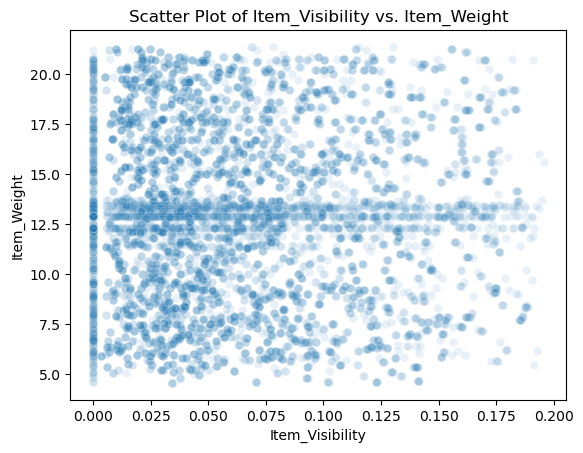

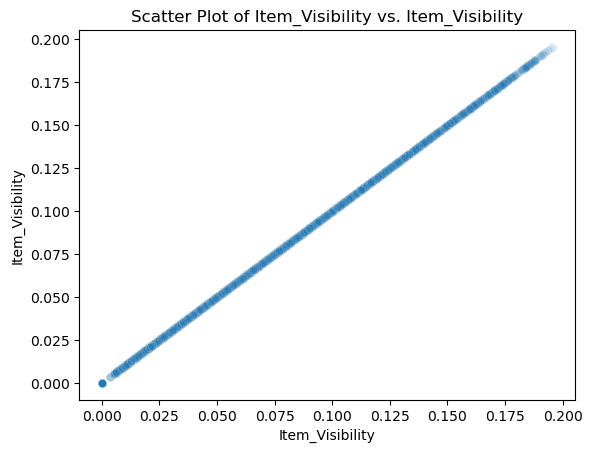

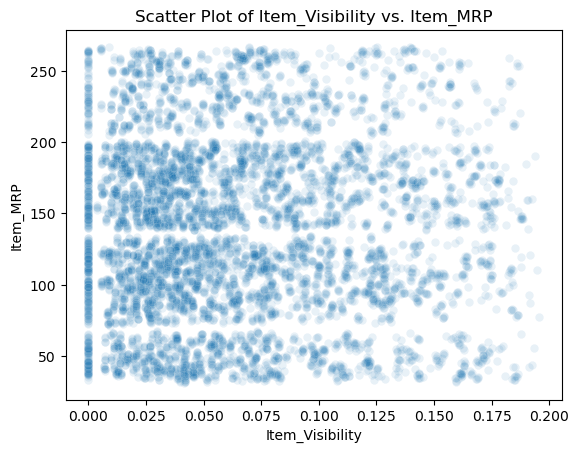

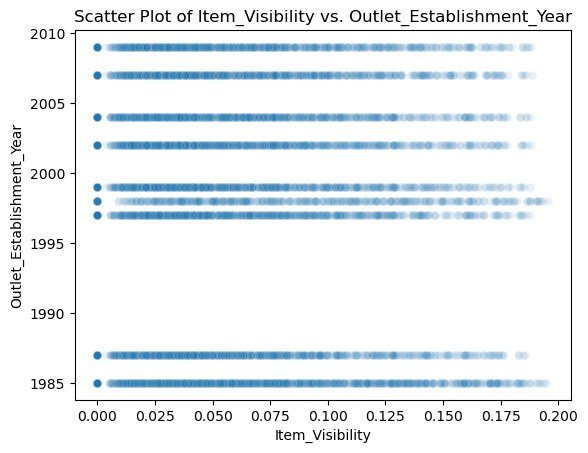

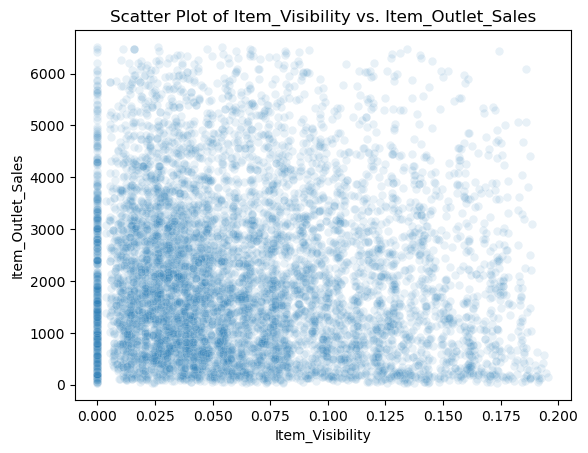

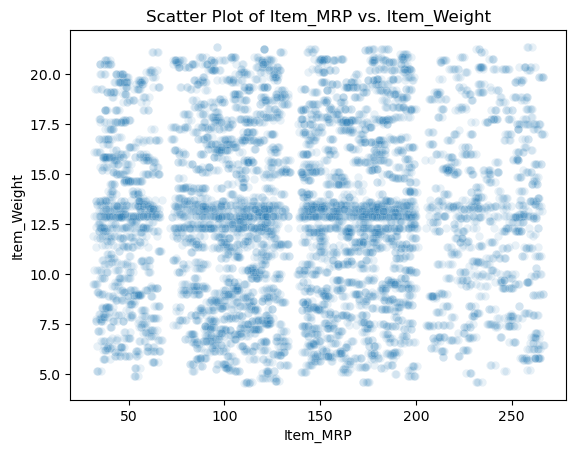

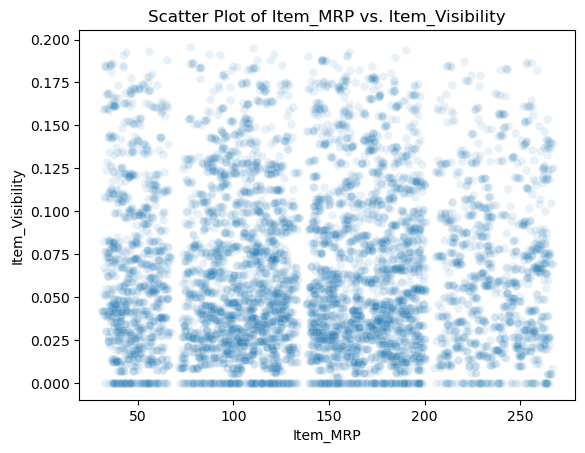

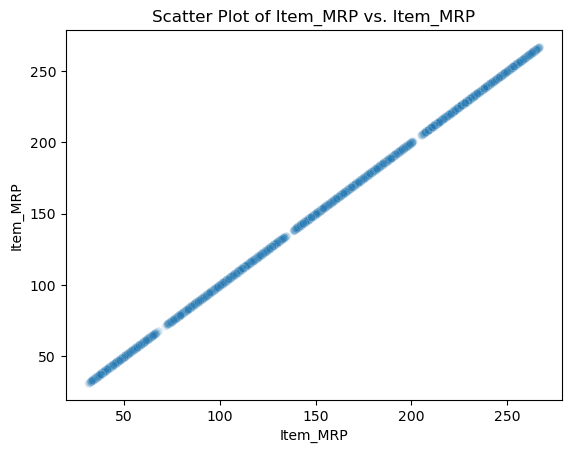

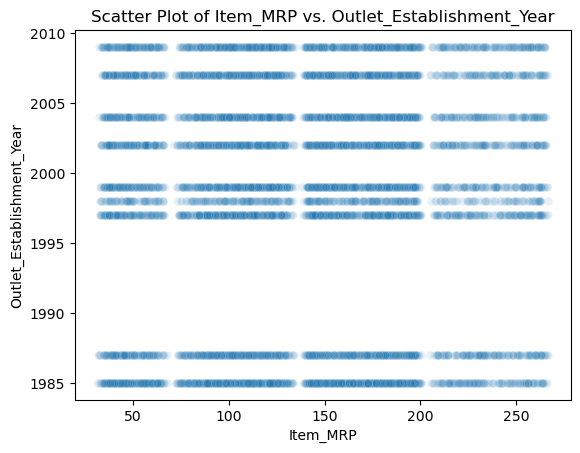

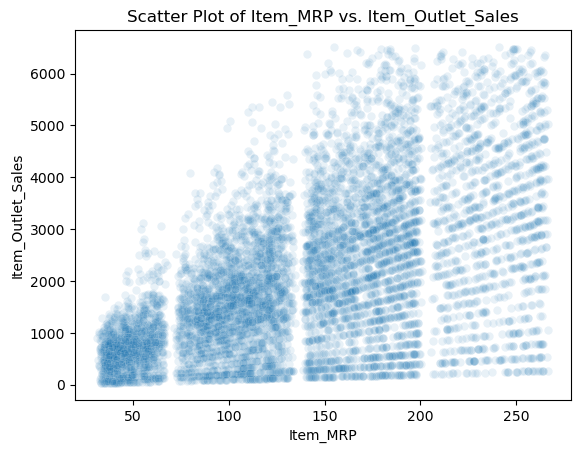

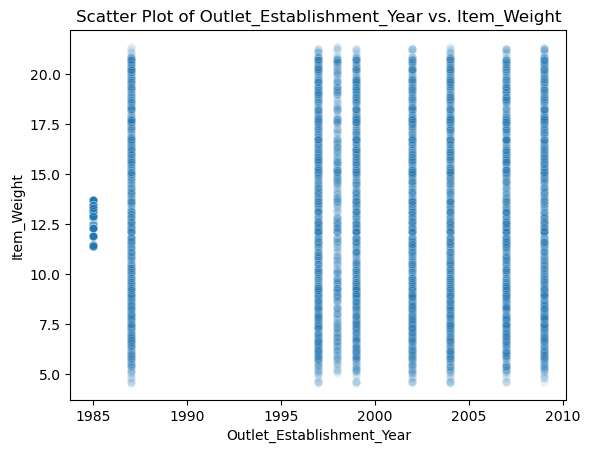

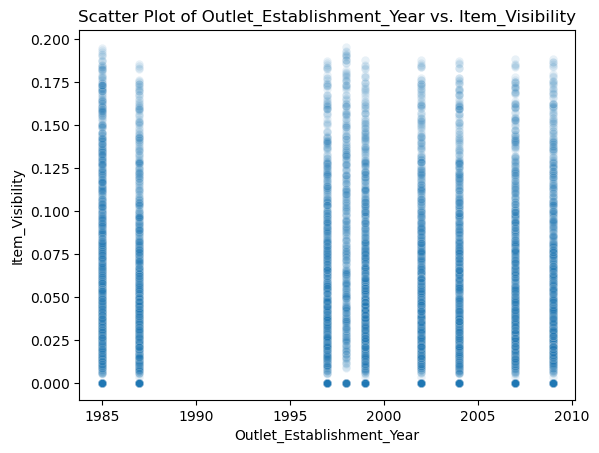

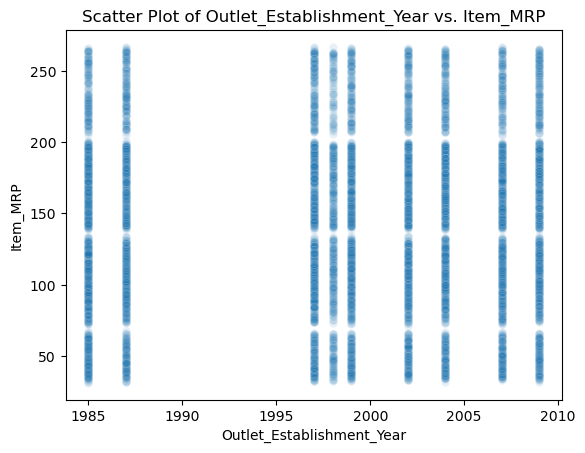

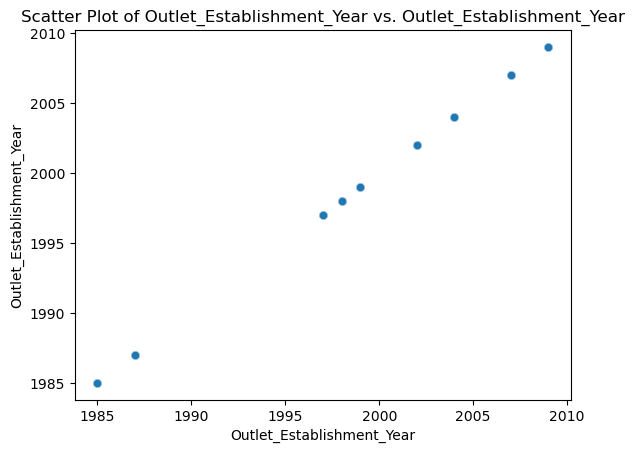

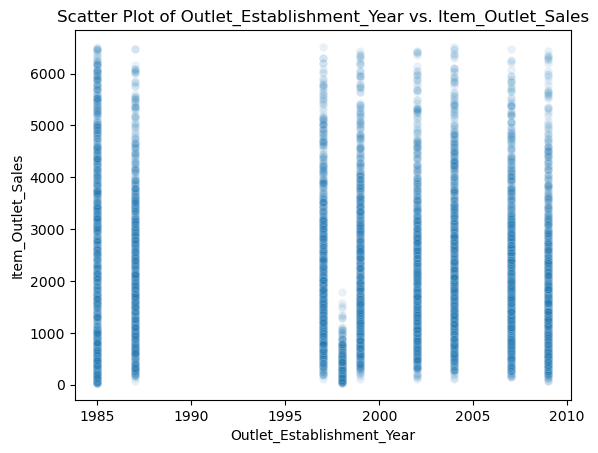

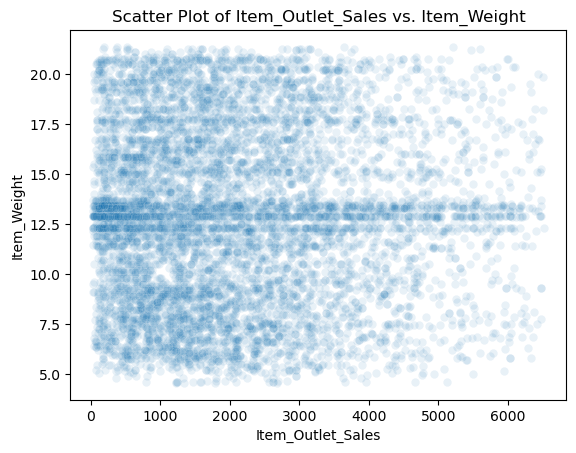

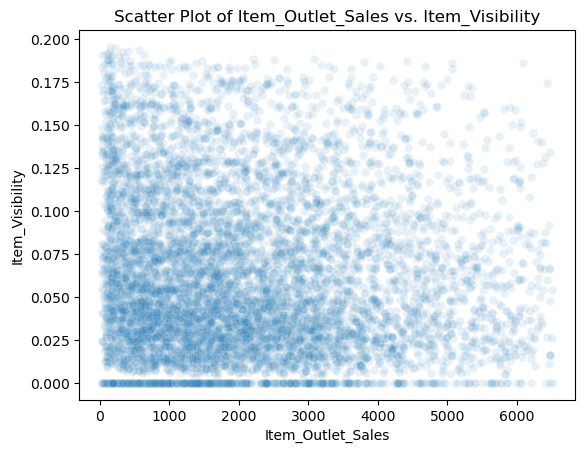

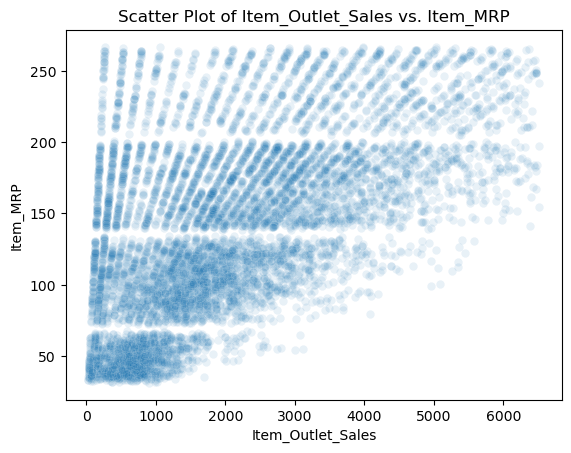

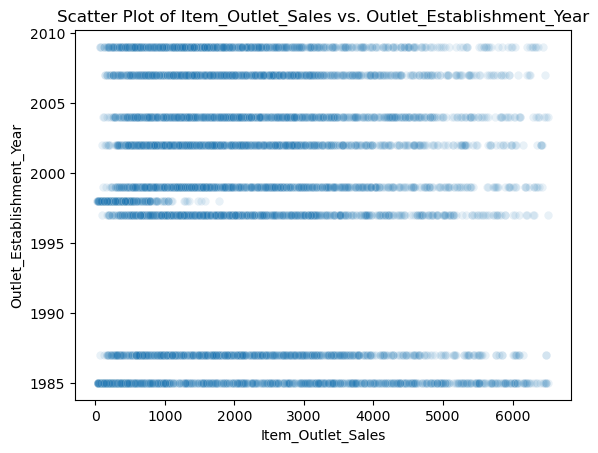

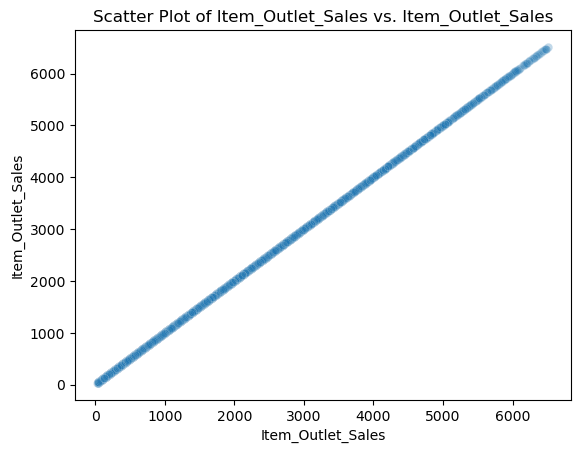

In [45]:
Columns= train_data.select_dtypes(include="number").columns
for col1 in Columns:
 for col2 in Columns:
  sns.scatterplot(data=train_data, x=col1, y=col2, alpha=0.1)
  plt.title('Scatter Plot of '+ col1 + ' vs. '+ col2)
  plt.xlabel(col1)
  plt.ylabel(col2)
  plt.show()

In [46]:
train_data.groupby("Item_Type")["Item_Outlet_Sales"].mean().sort_values()

Item_Type
Soft Drinks              1879.828845
Others                   1923.599961
Health and Hygiene       1933.190932
Breakfast                1941.328658
Baking Goods             1965.186929
Frozen Foods             2046.185521
Meat                     2046.950164
Hard Drinks              2080.066699
Dairy                    2084.155161
Household                2150.280519
Breads                   2153.978405
Fruits and Vegetables    2177.581899
Canned                   2179.487303
Snack Foods              2187.000153
Starchy Foods            2302.063531
Seafood                  2524.047800
Name: Item_Outlet_Sales, dtype: float64

In [47]:
train_data.groupby("Item_Type")["Item_MRP"].mean().sort_values()

Item_Type
Baking Goods             126.382651
Soft Drinks              127.243590
Health and Hygiene       128.850729
Others                   133.628634
Frozen Foods             136.250626
Hard Drinks              136.268943
Meat                     137.809906
Canned                   138.744509
Breakfast                141.440000
Breads                   142.220494
Fruits and Vegetables    142.278343
Starchy Foods            144.709016
Snack Foods              144.839112
Seafood                  145.210054
Dairy                    145.890152
Household                147.536201
Name: Item_MRP, dtype: float64

In [48]:
train_data.groupby("Outlet_Size")["Item_Outlet_Sales"].mean().sort_values()

Outlet_Size
Small     1913.873125
Medium    2154.961827
High      2227.651550
Name: Item_Outlet_Sales, dtype: float64

In [49]:
train_data.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].mean().sort_values()

Outlet_Location_Type
Tier 1    1873.653045
Tier 3    2122.818150
Tier 2    2250.044737
Name: Item_Outlet_Sales, dtype: float64

In [50]:
train_data.groupby("Outlet_Location_Type")["Outlet_Type"].apply(lambda x:x.mode())

Outlet_Location_Type   
Tier 1                0    Supermarket Type1
Tier 2                0    Supermarket Type1
Tier 3                0    Supermarket Type2
Name: Outlet_Type, dtype: object

In [51]:
train_data.groupby("Outlet_Type")["Item_Outlet_Sales"].mean().sort_values()

Outlet_Type
Grocery Store         340.712104
Supermarket Type2    1970.575105
Supermarket Type1    2246.068624
Supermarket Type3    3206.453434
Name: Item_Outlet_Sales, dtype: float64

In [52]:
train_data.groupby("Outlet_Type")["Outlet_Type"].count().sort_values()

Outlet_Type
Supermarket Type3     778
Supermarket Type2     856
Grocery Store         874
Supermarket Type1    5161
Name: Outlet_Type, dtype: int64

In [53]:
train_data.select_dtypes(include='object').nunique()

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [54]:
label_encoder = LabelEncoder()
train_data['Outlet_Size'] = label_encoder.fit_transform(train_data['Outlet_Size'])
train_data['Outlet_Location_Type'] = label_encoder.fit_transform(train_data['Outlet_Location_Type'])
train_data['Outlet_Establishment_Year'] = label_encoder.fit_transform(train_data['Outlet_Establishment_Year'])

In [55]:
categorical_columns = ["Item_Type", "Outlet_Identifier", "Outlet_Type"]

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse =False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(train_data[["Item_Type", "Outlet_Identifier", "Outlet_Type"]])

columns_encoded=encoder.get_feature_names_out(["Item_Type", "Outlet_Identifier", "Outlet_Type"])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_td = pd.DataFrame(one_hot_encoded, columns =columns_encoded)

#print(one_hot_td.head())
#train_data.reset_index(drop=True, inplace=True)
#one_hot_td.reset_index(drop=True, inplace=True)

# Concatenate the one-hot encoded dataframe with the original dataframe
train_data_encoded = pd.concat([train_data.reset_index(drop=True), one_hot_td.reset_index(drop=True)], axis=1)

# Drop the original categorical columns
train_data_encoded = train_data_encoded.drop(categorical_columns, axis=1)

In [56]:
train_data_new = pd.get_dummies(train_data_encoded, columns=['Item_Fat_Content'])

In [57]:
category_frequency = train_data_new['Item_Identifier'].value_counts() / len(train_data_new)
train_data_new['Item_Identifier'] = train_data_new['Item_Identifier'].map(category_frequency)

In [58]:
train_data_new.head(20)

Item_Identifier  Item_Weight  Item_Visibility  Item_MRP  \
0          0.000913     9.300000         0.016047  249.8092   
1          0.000782     5.920000         0.019278   48.2692   
2          0.000913    17.500000         0.016760  141.6180   
3          0.000782    19.200000         0.000000  182.0950   
4          0.000652     8.930000         0.000000   53.8614   
5          0.000391    10.395000         0.000000   51.4008   
6          0.000913    13.650000         0.012741   57.6588   
7          0.000913    12.909941         0.127470  107.7622   
8          0.000913    16.200000         0.016687   96.9726   
9          0.000652    19.200000         0.094450  187.8214   
10         0.000913    11.800000         0.000000   45.5402   
11         0.000782    18.500000         0.045464  144.1102   
12         0.000913    15.100000         0.100014  145.4786   
13         0.000652    17.600000         0.047257  119.6782   
14         0.000652    16.350000         0.068024  196.4426   
15         0.000913     9.000000         0.069089   56.3614   
16         0.000391    11.800000         0.008596  115.3492   
17         0.000913     9.000000         0.069196   54.3614   
18         0.000913    11.425206         0.034238  113.2834   
19         0.000652    13.350000         0.102492  230.5352   

    Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0                           4            1                     0   
1                           8            1                     2   
2                           4            1                     0   
3                           3            1                     2   
4                           1            0                     2   
5                           8            1                     2   
6                           1            0                     2   
7                           0            1                     2   
8                           5            1                     1   
9                           7            1                     1   
10                          4            1                     0   
11                          2            2                     0   
12                          4            1                     0   
13                          2            2                     0   
14                          1            0                     2   
15                          2            2                     0   
16                          8            1                     2   
17                          4            1                     0   
18                          0            1                     2   
19                          6            2                     1   

    Item_Outlet_Sales  Item_Type_Baking Goods  Item_Type_Breads  ...  \
0           3735.1380                     0.0               0.0  ...   
1            443.4228                     0.0               0.0  ...   
2           2097.2700                     0.0               0.0  ...   
3            732.3800                     0.0               0.0  ...   
4            994.7052                     0.0               0.0  ...   
5            556.6088                     1.0               0.0  ...   
6            343.5528                     0.0               0.0  ...   
7           4022.7636                     0.0               0.0  ...   
8           1076.5986                     0.0               0.0  ...   
9           4710.5350                     0.0               0.0  ...   
10          1516.0266                     0.0               0.0  ...   
11          2187.1530                     0.0               0.0  ...   
12          1589.2646                     0.0               0.0  ...   
13          2145.2076                     0.0               0.0  ...   
14          1977.4260                     0.0               0.0  ...   
15          1547.3192                     0.0               0.0  ...   
16          1621.8888      

In [59]:
scaler = MinMaxScaler()
Columns = np.array(train_data_new.select_dtypes(include='number').columns)

for col in Columns:
    train_data_new[col] = scaler.fit_transform(train_data_new[[col]])

In [60]:
# Splitting the dataset into features (X) and target variable (y)
X = train_data_new.drop("Item_Outlet_Sales", axis=1)
y = train_data_new['Item_Outlet_Sales']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head(30)
y_train.head(30)
# Creating a Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.023811662907191004
R-squared: 0.5399224472986972


In [61]:
# Create and train the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength (hyperparameter)
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)


Training MSE: 0.02439690280054918
Testing MSE: 0.023811069135444438


In [62]:
lasso_model = Lasso(alpha=1.0)  # Alpha is the regularization strength (hyperparameter)
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_train = lasso_model.predict(X_train)
y_pred_test = lasso_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)

Training MSE: 0.054509990987286726
Testing MSE: 0.051755825391885925


In [63]:
X_train.describe()

Item_Identifier  Item_Weight  Item_Visibility     Item_MRP  \
count      6135.000000  6135.000000      6135.000000  6135.000000   
mean          0.550285     0.495166         0.325243     0.457568   
std           0.178506     0.254808         0.237123     0.261558   
min           0.000000     0.000000         0.000000     0.000000   
25%           0.375000     0.282525         0.137103     0.261773   
50%           0.500000     0.495413         0.273164     0.464882   
75%           0.625000     0.693361         0.477264     0.647940   
max           1.000000     1.000000         1.000000     1.000000   

       Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
count                6135.000000  6135.000000           6135.000000   
mean                    0.484209     0.582070              0.554116   
std                     0.339285     0.299284              0.405484   
min                     0.000000     0.000000              0.000000   
25%                     0.125000     0.500000              0.000000   
50%                     0.500000     0.500000              0.500000   
75%                     0.750000     1.000000              1.000000   
max                     1.000000     1.000000              1.000000   

       Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  ...  \
count             6135.000000       6135.000000          6135.000000  ...   
mean                 0.078566          0.030318             0.013366  ...   
std                  0.269082          0.171474             0.114845  ...   
min                  0.000000          0.000000             0.000000  ...   
25%                  0.000000          0.000000             0.000000  ...   
50%                  0.000000          0.000000             0.000000  ...   
75%                  0.000000          0.000000             0.000000  ...   
max                  1.000000          1.000000             1.000000  ...   

       Outlet_Identifier_OUT035  Outlet_Identifier_OUT045  \
count               6135.000000               6135.000000   
mean                   0.107905                  0.112795   
std                    0.310286                  0.316368   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  0.000000   
max                    1.000000                  1.000000   

       Outlet_Identifier_OUT046  Outlet_Identifier_OUT049  \
count               6135.000000               6135.000000   
mean                   0.112306                  0.113773   
std                    0.315769                  0.317562   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  0.000000   
max                    1.000000                  1.000000   

       Outlet_Type_Grocery Store  Outlet_Type_Supermarket Type1  \
count                6135.000000                    6135.000000   
mean                    0.115729                       0.667319   
std                     0.319926                       0.471212   
min                     0.000000                       0.000000   
25%                     0.000000                       0.000000   
50%                     0.000000                       1.000000   
75%                     0.000000                       1.000000   
max                     1.000000                       1.000000   

       Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  \
count                    6135.000000                    6135.000000   
mean                        0.114751                       0.102200   
std                         0.318748                       0.302936   
min                         0.000000                       0.00

In [77]:
# Define the hyperparameters grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}  # Regularization strength

# Create a Ridge regression model
model = Ridge()

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Best Hyperparameters:", best_params)
print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)

Best Hyperparameters: {'alpha': 1}
Training MSE: 0.023955120649195263
Testing MSE: 0.025596341978842193


In [75]:
k = 5

# Initialize a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize a list to store the mean squared errors (MSEs) for each fold
mse_list = []

# Iterate over the folds
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets for this fold
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate the mean squared error (MSE) for this fold
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

# Calculate the average MSE across all folds
average_mse = np.mean(mse_list)

print("Average MSE across all folds:", average_mse)

Average MSE across all folds: 0.02618425237690618
